In [1]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn
!pip install gensim keras tensorflow


^C
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 840.2 kB/s eta 0:07:27
   ---------------------------------------- 0.8/376.0 MB 987.4 kB/s eta 0:06:20
   ---------------------------------------- 0.8/376.0 MB 987.4 kB/s eta 0:06:20
   ---------------------------------------- 1.3/376.0 MB 1.0 MB/s eta 0:05:58
   ---------------------------------------- 1.6/376.0 MB 1.1 MB/s eta 0:05:31
   ---------------------------------------- 2.1/376.0 MB 1.2 MB/s eta 0:05:00
   ---------------------------------------- 2.4/376.0 MB 1.3 MB/s eta 0:04:39
   ---------------------------------------- 2.4/376.0 MB 1.3 MB/s eta 0:04:39
   ---------------------------------------- 2.4/376.0 MB 1.3 MB/s eta 0:04:39
   ---------------------------------------- 2.6/376.0 MB 1.1 MB/s eta 0:05:5

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Load the CSV file (adjust encoding if needed)
df = pd.read_csv("MRFS_1_Union_Budget.csv", encoding='ISO-8859-1')

# Display basic structure
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ministry                           159 non-null    object 
 1   Ministry/Demand                    159 non-null    object 
 2   Budget Estimates2023-2024-Revenue  159 non-null    float64
 3   Budget Estimates2023-2024-Capital  159 non-null    float64
 4   Budget Estimates2023-2024-Total    159 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.3+ KB
None


In [7]:
df.head()


,Ministry,Ministry/Demand,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total
0,Ministry of Agriculture and Farmers Welfare,Total,124982.96,52.83,125035.79
1,Ministry of Agriculture and Farmers Welfare,1. Department of Agriculture and Farmers Welfare,115489.37,42.42,115531.79
2,Ministry of Agriculture and Farmers Welfare,2. Department of Agricultural Research and Edu...,9493.59,10.41,9504.00
3,Department of Atomic Energy,Total,9096.99,15981.50,25078.49
4,Department of Atomic Energy,3. Atomic Energy,9096.99,15981.50,25078.49


In [8]:
df.isnull().sum()

Ministry                             0
Ministry/Demand                      0
Budget Estimates2023-2024-Revenue    0
Budget Estimates2023-2024-Capital    0
Budget Estimates2023-2024-Total      0
dtype: int64

In [11]:
df[df.duplicated()]

,Ministry,Ministry/Demand,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total


In [12]:
df.columns

Index(['Ministry', 'Ministry/Demand', 'Budget Estimates2023-2024-Revenue',
       'Budget Estimates2023-2024-Capital', 'Budget Estimates2023-2024-Total'],
      dtype='object')

In [14]:
df.describe()

,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total
count,1.590000e+02,1.590000e+02,1.590000e+02
mean,6.607805e+04,1.888606e+04,8.496410e+04
std,3.161468e+05,9.081947e+04,3.929888e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.757450e+03,5.940000e+00,2.250485e+03
50%,4.661160e+03,5.283000e+01,5.806130e+03
75%,1.811199e+04,8.109750e+02,2.563138e+04
max,3.502136e+06,1.000961e+06,4.503097e+06


In [17]:
!pip install tweepy


In [18]:
import tweepy
print("Tweepy installed successfully!")


Tweepy installed successfully!


In [21]:
!pip install snscrape


In [31]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00


In [32]:
import pandas as pd
import re
from textblob import TextBlob



In [33]:
df_tweets = pd.read_csv("tweetsdata.csv")
df_tweets.head()


,tweets
0,Talk on Union Budget 2019!! pic.twitter.com/8D...
1,Here is a quick highlight on Union Budget 2019...
2,Union Budget 2019: \r\n\r\nAuto Industry Disap...
3,"Mr. Dhiraj Jain, Director, Mahagun India, shar..."
4,A 19 Years Old Teenager @tarak9999 breaks All ...


In [34]:
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # remove URLs
    tweet = re.sub(r"@\w+", "", tweet)     # remove mentions
    tweet = re.sub(r"#\w+", "", tweet)     # remove hashtags
    tweet = re.sub(r"[^\w\s]", "", tweet)  # remove punctuation
    tweet = tweet.lower().strip()          # convert to lowercase and trim
    return tweet

df_tweets['cleaned'] = df_tweets['tweets'].apply(clean_tweet)


In [35]:
df_tweets['cleaned']

0      talk on union budget 2019 pictwittercom8dq0qhmosm
1      here is a quick highlight on union budget 2019...
2      union budget 2019 \r\n\r\nauto industry disapp...
3      mr dhiraj jain director mahagun india shared h...
4      a 19 years old teenager  breaks all the old re...
                             ...                        
704    union minister piyush goyal it has given a hug...
705        2019 union budget is nothing but a new जमल of
706    budget 2019 govts ev push casts shadow on trad...
707    bjp leader  pointed out loopholes in the union...
708    find below the amount kaduna state government ...
Name: cleaned, Length: 709, dtype: object

In [36]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df_tweets['sentiment'] = df_tweets['cleaned'].apply(get_sentiment)


In [37]:
df_tweets['sentiment']

0       Neutral
1      Positive
2      Negative
3       Neutral
4      Positive
         ...   
704    Positive
705    Positive
706     Neutral
707     Neutral
708     Neutral
Name: sentiment, Length: 709, dtype: object

In [38]:
df_tweets[['tweets', 'cleaned', 'sentiment']].head(10)


,tweets,cleaned,sentiment
0,Talk on Union Budget 2019!! pic.twitter.com/8D...,talk on union budget 2019 pictwittercom8dq0qhmosm,Neutral
1,Here is a quick highlight on Union Budget 2019...,here is a quick highlight on union budget 2019...,Positive
2,Union Budget 2019: \r\n\r\nAuto Industry Disap...,union budget 2019 \r\n\r\nauto industry disapp...,Negative
3,"Mr. Dhiraj Jain, Director, Mahagun India, shar...",mr dhiraj jain director mahagun india shared h...,Neutral
4,A 19 Years Old Teenager @tarak9999 breaks All ...,a 19 years old teenager breaks all the old re...,Positive
5,5 trillion for who ?? Ambani ?? Union Budget 2...,5 trillion for who ambani union budget 20192...,Neutral
6,Union Budget 2019: Railways focus to be on saf...,union budget 2019 railways focus to be on safe...,Neutral
7,.@nsitharaman to present Union Budget of Modi ...,to present union budget of modi govt 20 today\...,Positive
8,The process of legislative reforms on Labour i...,the process of legislative reforms on labour i...,Neutral
9,#Moneypitara: Highlights of Budget 2019-20: #B...,highlights of budget 201920 pictwittercomgyf...,Neutral


In [39]:
df_tweets.to_csv("sentiment_results.csv", index=False)

In [41]:
import warnings
warnings.filterwarnings('ignore')

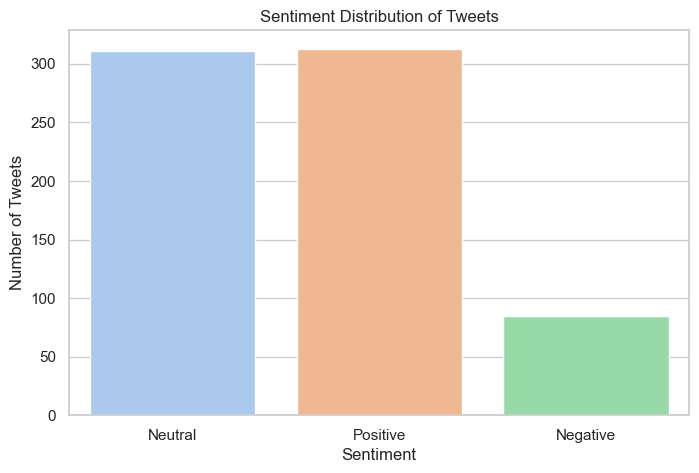

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df_tweets, palette='pastel')
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


In [44]:
!pip install wordcloud

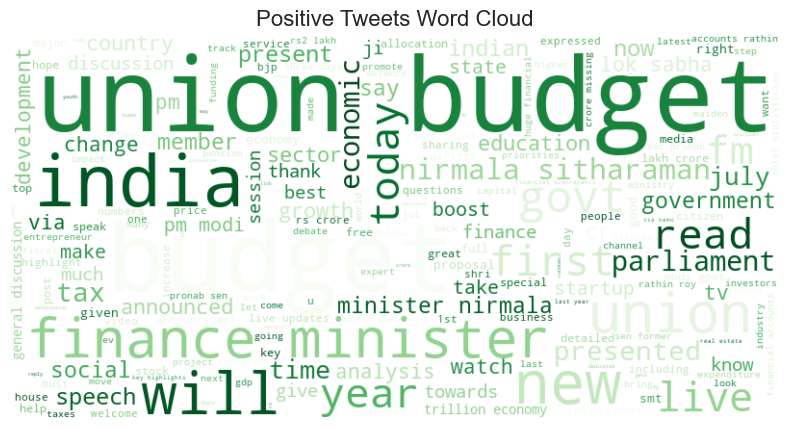

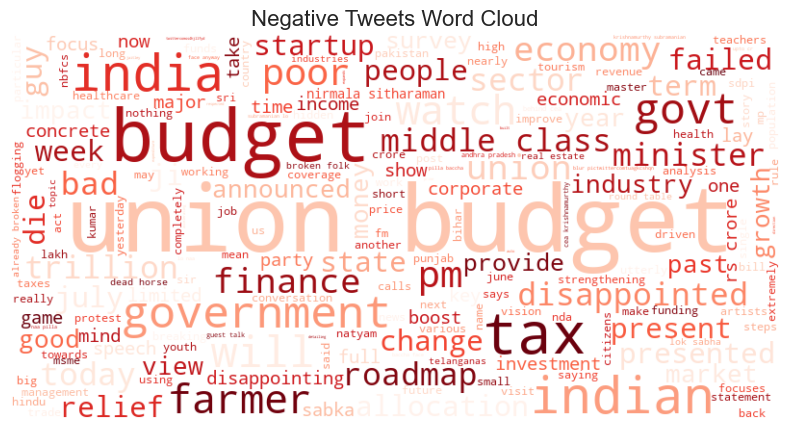

In [45]:
from wordcloud import WordCloud

# Combine all positive and negative cleaned tweets into one string
positive_text = " ".join(df_tweets[df_tweets['sentiment'] == 'Positive']['cleaned'])
negative_text = " ".join(df_tweets[df_tweets['sentiment'] == 'Negative']['cleaned'])

# Generate Positive Word Cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Generate Negative Word Cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot Positive Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets Word Cloud", fontsize=16)
plt.show()

# Plot Negative Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets Word Cloud", fontsize=16)
plt.show()


In [46]:
from textblob import TextBlob

# Add polarity column
df_tweets['polarity'] = df_tweets['cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Top 5 positive tweets
top_pos = df_tweets.sort_values(by='polarity', ascending=False).head(5)

# Top 5 negative tweets
top_neg = df_tweets.sort_values(by='polarity').head(5)

top_pos[['tweets', 'polarity']], top_neg[['tweets', 'polarity']]


(                                                tweets  polarity
 101  Want to know which stocks should be selected p...       1.0
 196  #Budget2019 best describe this year budget pic...       1.0
 281  Thank you @jayantsinha ji for brilliant sessio...       0.9
 13   https://www.youtube.com/watch?v=4aPrRNPE3dA …\...       0.9
 72   Technology leaders welcome the Governments' pr...       0.8,
                                                 tweets  polarity
 2    Union Budget 2019: \r\n\r\nAuto Industry Disap...    -0.750
 379  Union Budget Disappointed People Of Andhra Pra...    -0.750
 38   Report: The Indian rupee furthered its gains b...    -0.700
 703  The #Budget2019 failed to raise the spirits of...    -0.625
 67   SDPI Press release on Union Budget 2019: \r\nS...    -0.600)

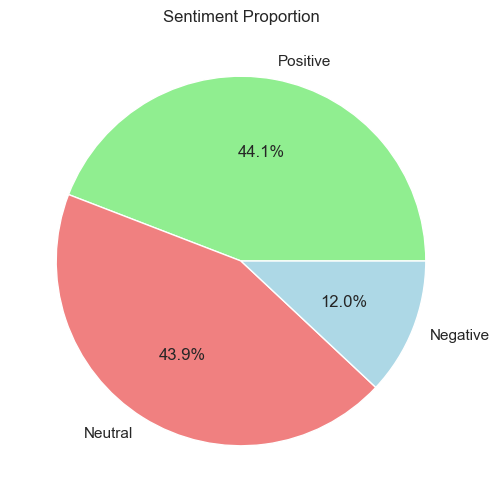

In [47]:
df_tweets['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title("Sentiment Proportion")
plt.ylabel("")
plt.show()


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))  # bigrams
bigrams = vectorizer.fit_transform(df_tweets['cleaned'])
sum_bigrams = bigrams.sum(axis=0)
bigrams_freq = [(word, sum_bigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)
bigrams_freq[:10]


[('union budget', 376),
 ('budget 2019', 262),
 ('the union', 135),
 ('budget 201920', 103),
 ('of the', 90),
 ('in the', 82),
 ('on the', 76),
 ('finance minister', 62),
 ('on union', 47),
 ('the budget', 40)]

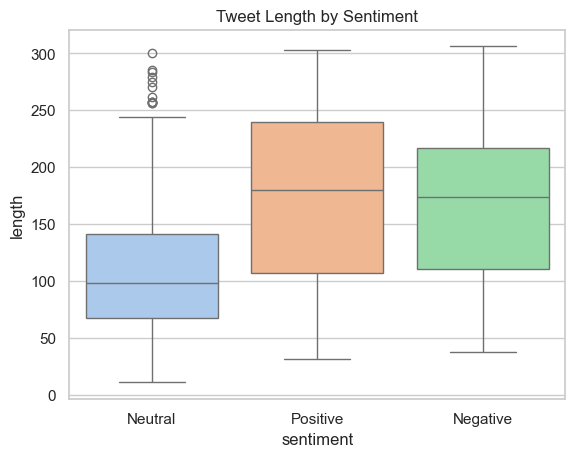

In [49]:
df_tweets['length'] = df_tweets['cleaned'].apply(len)
sns.boxplot(x='sentiment', y='length', data=df_tweets, palette='pastel')
plt.title("Tweet Length by Sentiment")
plt.show()


In [50]:
!pip install nrclex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43341 sha256=d475b2899bae30da7cb7a3217fb26f30ec905e3dee71839a8ed8315607c49005
  Stored in directory: c:\users\amayy\appdata\local\pip\cache\wheels\1f\e8\d0\e3c3da0ef3b37ef4381dbf5c9401f3a9861a63ce221b13d8bb
Successfully built nrclex


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [57]:
# Features and labels
X = df_tweets['cleaned']
y = df_tweets['sentiment']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Train classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6690140845070423
Confusion Matrix:
 [[ 0  2 13]
 [ 0 38 14]
 [ 0 18 57]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.66      0.73      0.69        52
    Positive       0.68      0.76      0.72        75

    accuracy                           0.67       142
   macro avg       0.44      0.50      0.47       142
weighted avg       0.60      0.67      0.63       142



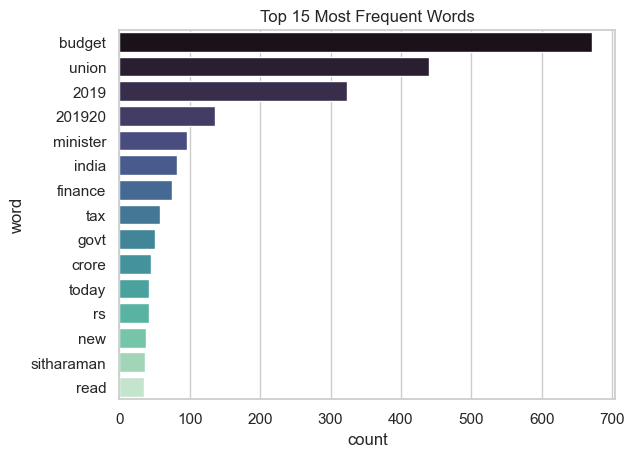

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
words = vectorizer.fit_transform(df_tweets['cleaned'])
sum_words = words.sum(axis=0)

# Sort and display top 15
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:15]

# Bar plot
words_df = pd.DataFrame(top_words, columns=['word', 'count'])
sns.barplot(x='count', y='word', data=words_df, palette='mako')
plt.title("Top 15 Most Frequent Words")
plt.show()


In [87]:
df1=pd.read_excel('Emotions csv.xlsx')

In [88]:
df1

,Emotions
0,Anger
1,Happy
2,Sad
3,Fear
4,Love
5,Hatred


In [93]:
from sklearn.preprocessing import LabelEncoder

data = ['Anger', 'Fear', 'Sad', 'Hatred','Love', 'Happy']
label_encoder = LabelEncoder()
numeric_data = label_encoder.fit_transform(data)
print(numeric_data)  # Output: [0, 1, 2]


[0 1 5 3 4 2]


In [102]:
import pandas as pd
data = pd.DataFrame({
    'Anger': [0.5, 0.4],
    'Fear': [0.8, 0.7],
    'Sad': [0.3, 0.5],
    'Hatred': [0.2, 0.3],
    'Love': [0.9, 0.8],
    'Happy': [0.6, 0.5]
})


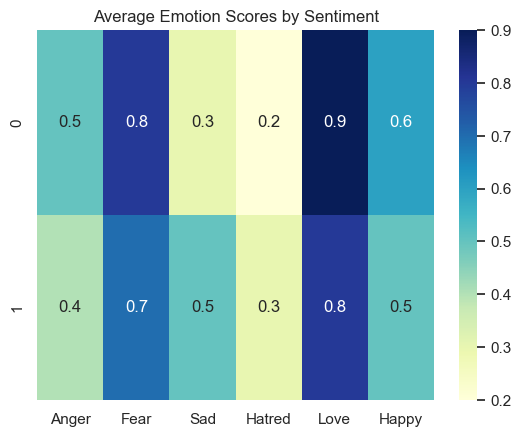

In [103]:
import seaborn as sns

sns.heatmap(data, cmap='YlGnBu', annot=True)
plt.title("Average Emotion Scores by Sentiment")
plt.show()
